> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project One: Database_Soccer [Fesomade Ayomide]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
>This soccer database comes from Kaggle. It contains data for soccer matches, players, and teams from several European countries from 2008 to 2016. This dataset is quite extensive, and contain details on soccer teams and their players in the following proportion:

>**Team**	*103,916 entries*

>**Country**	*51,958 entries*

>**League**	*51958 entries*

>**Match**	*51,958 entries*

>**Player**	*11,075 entries*

>**Player_Attributes**	*183,978 entries*

>**Team_Attributes**	*1,458 entries*

> The dataset is quite large therefore I will limit my analysis to just the league data. From doing a quick preview, not much analysis is possible on just a csv file as they do not contain enough information on their own hence, there is need for combining and replacing columns in one csv file with another courtesy of primary and foreign keys (remember the dataset is sql compliant). Finally, my interest in this dataset is to analyze the teams and leagues over the course of these seasons for possible trends and insights.


### Question(s) for Analysis
>At the start of this project, I really am unsure of what questions but eventually asked these two:\
**Q1: In the Belgium jupiler League, which teams (home or away) won more matches in August 2008?**\
**Q2: What is the aggregate of goals scored by home teams compared to away teams in the Belgium Jupiler League in August 2008?**


> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


> While importing my dataset for this project, I created suitable dataframe naming conventions to assist me. Like I earlier siad, I am interested in the league data but I perused all the available dataset to see what they contain and might possibly hold.

In [3]:
#reading csv files into my dataframes
soccer_country_df = pd.read_csv('country.csv')
soccer_league_df = pd.read_csv('league.csv')
soccer_match_df = pd.read_csv('match.csv')
soccer_team_df = pd.read_csv('team.csv')
soccer_player_df = pd.read_csv('player.csv')
soccer_teamatt_df = pd.read_csv('team_attributes.csv')
soccer_playeratt_df = pd.read_csv('player_attributes.csv')

ABSTRACT OF DATA ASSESSMENT STAGE

This is a brief walk-through of my thinking process and analysis overview. 
Basic details are summarized here but you'd have to check detailed steps for more info

WHAT DID I KNOW AT THE START?
I know the dataset spans eight years/football seasons (2008-2016)

WHAT DID I FIND OUT?
The countries covered in that timeframe
The leagues covered in that timeframe
The matches covered in that timeframe
The teams covered in that timeframe
The players covered in that timeframe
The analytical descriptions of teams and players in that timeframe

HOW DID I FIND THAT OUT?
Follow below - more findings not summarized here

In [4]:
# Checking the country dataset

soccer_country_df.info() # an overview of columns and their indexes in the dataset
soccer_country_df.shape # to know in total, numbers of rows and columns in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


(11, 2)

In [5]:
# to quickly see country data tables or dataset having had background info on it
soccer_country_df.head(12)

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


>I can see that each country has a unique id but nothing more, this data is not useful if it is treated as standalone

In [6]:
# Checking the league dataset

soccer_league_df.info() # an overview of columns and their indexes in the dataset
soccer_league_df.shape # to know in total, numbers of rows and columns in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


(11, 3)

In [7]:
# to quickly see league data tables or dataset having had background info on it
soccer_league_df.head(12)

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


>I can see each country runs its own league and each league has a unique *country_id*. However,  I can also see this data is connected to the country data opened initially and the **id** column is the link that brings them together. Finally ***id*** (from country) and the ***country_id*** (from league) are the same and that could just be for convention's sake.

In [8]:
# checking the match dataset

soccer_match_df.info() # trying to print an overview of the columns 
                       # and their indexes in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [9]:
# info() doesn't return desired results
# I passed some arguments into the info command
soccer_match_df.info(verbose=True, null_counts=True) # also works when info() doesn't reflect the full details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 115 columns):
 #    Column            Non-Null Count  Dtype  
---   ------            --------------  -----  
 0    id                25979 non-null  int64  
 1    country_id        25979 non-null  int64  
 2    league_id         25979 non-null  int64  
 3    season            25979 non-null  object 
 4    stage             25979 non-null  int64  
 5    date              25979 non-null  object 
 6    match_api_id      25979 non-null  int64  
 7    home_team_api_id  25979 non-null  int64  
 8    away_team_api_id  25979 non-null  int64  
 9    home_team_goal    25979 non-null  int64  
 10   away_team_goal    25979 non-null  int64  
 11   home_player_X1    24158 non-null  float64
 12   home_player_X2    24158 non-null  float64
 13   home_player_X3    24147 non-null  float64
 14   home_player_X4    24147 non-null  float64
 15   home_player_X5    24147 non-null  float64
 16   home_player_X6    24

C:\Users\Admin\AppData\Local\Temp\ipykernel_4644\3663812866.py:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  soccer_match_df.info(verbose=True, null_counts=True) # also works when info() doesn't reflect the full details


In [10]:
soccer_match_df.shape # to know in total the numbers of
                      # rows and columns in the dataframe

(25979, 115)

In [11]:
soccer_match_df.head(10)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
5,6,1,1,2008/2009,1,2008-09-24 00:00:00,492478,8203,8342,1,...,1.67,4.35,3.40,1.70,4.50,3.40,1.70,NaN,NaN,NaN
6,7,1,1,2008/2009,1,2008-08-16 00:00:00,492479,9999,8571,2,...,3.60,2.10,3.25,3.00,1.85,3.25,3.75,2.10,3.25,3.10
7,8,1,1,2008/2009,1,2008-08-16 00:00:00,492480,4049,9996,1,...,2.40,2.80,3.25,2.25,2.80,3.20,2.25,2.88,3.25,2.20
8,9,1,1,2008/2009,1,2008-08-16 00:00:00,492481,10001,9986,1,...,3.10,2.25,3.25,2.80,2.20,3.30,2.80,2.25,3.20,2.80
9,10,1,1,2008/2009,10,2008-11-01 00:00:00,492564,8342,8571,4,...,10.00,1.30,4.35,8.50,1.25,5.00,10.00,1.29,4.50,9.00


In [12]:
soccer_match_df.tail(10)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
25969,25970,24558,24558,2015/2016,8,2015-09-12 00:00:00,1992086,9931,10190,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25970,25971,24558,24558,2015/2016,8,2015-09-12 00:00:00,1992087,10192,9824,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25971,25972,24558,24558,2015/2016,8,2015-09-13 00:00:00,1992088,10199,9956,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25972,25973,24558,24558,2015/2016,8,2015-09-13 00:00:00,1992089,10243,10191,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25973,25974,24558,24558,2015/2016,8,2015-09-13 00:00:00,1992090,10179,7896,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25978,25979,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992095,10192,9931,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
for i, v in enumerate(soccer_match_df.columns):
    print(i, v)

0 id
1 country_id
2 league_id
3 season
4 stage
5 date
6 match_api_id
7 home_team_api_id
8 away_team_api_id
9 home_team_goal
10 away_team_goal
11 home_player_X1
12 home_player_X2
13 home_player_X3
14 home_player_X4
15 home_player_X5
16 home_player_X6
17 home_player_X7
18 home_player_X8
19 home_player_X9
20 home_player_X10
21 home_player_X11
22 away_player_X1
23 away_player_X2
24 away_player_X3
25 away_player_X4
26 away_player_X5
27 away_player_X6
28 away_player_X7
29 away_player_X8
30 away_player_X9
31 away_player_X10
32 away_player_X11
33 home_player_Y1
34 home_player_Y2
35 home_player_Y3
36 home_player_Y4
37 home_player_Y5
38 home_player_Y6
39 home_player_Y7
40 home_player_Y8
41 home_player_Y9
42 home_player_Y10
43 home_player_Y11
44 away_player_Y1
45 away_player_Y2
46 away_player_Y3
47 away_player_Y4
48 away_player_Y5
49 away_player_Y6
50 away_player_Y7
51 away_player_Y8
52 away_player_Y9
53 away_player_Y10
54 away_player_Y11
55 home_player_1
56 home_player_2
57 home_player_3
58 home

Given the number of rows in the match dataset, here's what happened:

>I wanted to see how many columns had missing values and in what proportion

>I ran soccer_match_df.head(10) to see the top entries,and soccer_match_df.tail(10) to see the last entries

>Since the column names are many and weren't displayed in full,
I printed out just the columns just to see which columns might help gain insight into what I'm working with

>I then discovered that it covered matches across several leagues from several seasons and stage column when combine with date could be assumed to mean the matchweek as leagues often feature a long list of fixtures spread over matchweeks.

>I quickly observed that the line-ups of each team for the match was included 

>I also saw they attempted to add match statistics in the columns

>I observed the datatypes of the columns and noticed some columns that should logically be and object are float or int (line-up for eg) while those who logically should be int/float are object (match stat for eg)

>It was also obvious the country_id and league_id are lifted from the previously assessed table so it makes more sense to use the match dataset as the bedrock of my analysis and just import relevant columns from other datasets into it

>I then saw some acronyms to the right of the match stats which weren't descriptive enough to know what they referred to but seeing as they all had either 'H' or 'D' or 'A' as suffixes, I believed it to be odds of something happening (betting odds for example attempting to state the chances of Home win, a draw or an Away win)


In [14]:
#Checking the team dataset
soccer_team_df.info() # an overview of columns and their indexes in the dataset
soccer_team_df.shape # to know in total, numbers of 
                    # rows and columns in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


(299, 5)

In [15]:
soccer_team_df.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


Similarly, 299 team_names were encoded with team_api_id and when compared with match dataset, the only missing info is how to split into home team and away team plus it is difficult to identify which league did a certain team play from the data without additional info from other dataset when compared with the team id. Also, seeing the nature of football leagues we will also need to know the teams that got relegated in a particular season if we're going to do some robust team based analysis as well but for now, I want to keep it basic.

In [16]:
#Checking the player dataset
soccer_player_df.info() # an overview of columns and their indexes in the dataset
soccer_player_df.shape # to know in total, numbers of rows and columns in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


(11060, 7)

In [17]:
soccer_player_df.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


Similarly, player_names were encoded with player_api_id and when compared with match dataset, the problem is we dont know which years each player played for each club and maybe moved another team. This is not really my interest but it's good practice to build intuition

In [18]:
#Checking the team attributes dataset
soccer_teamatt_df.info() #an overview of columns and their indexes in the dataset
soccer_teamatt_df.shape #to know in total, numbers of rows and columns in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

(1458, 25)

In [19]:
soccer_teamatt_df.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


This just analytically explains the measures or descriptions of certain metrics that explains/quantifies them but I won't be touching on this dataset

In [20]:
# checking the player attributes dataset
soccer_playeratt_df.info() # an overview of columns and their indexes in the dataset
soccer_playeratt_df.shape # to know in total, numbers of rows and columns in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

(183978, 42)

In [21]:
soccer_playeratt_df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

>**Quick reminder of available dataframes to ease scrolling:

>*soccer_country_df*     **# df of countries and id**

>*soccer_league_df*      **# df of leagues and id**

>*soccer_match_df*       **# df of matches and stats across all leagues**

>*soccer_team_df*        **# df of teams in the leagues**

>*soccer_player_df*      **# df of players across the teams in the league**

>*soccer_teamatt_df*     **# df of team attributes**

>*soccer_playeratt_df*   **# df of player attributes** 

In [22]:
# joining columns - dataframes of country to league
# append method is deprecated so concat is used instead

country_league_df = pd.concat([soccer_league_df, soccer_country_df], axis = 1)

# naming convention is like this because 
# I want to append the country dataframe to that of the league 
# since league contains a significant part of country's df columns and more

# view dataframe to check for success
country_league_df.head(12)

,id,country_id,name,id,name
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy
5,13274,13274,Netherlands Eredivisie,13274,Netherlands
6,15722,15722,Poland Ekstraklasa,15722,Poland
7,17642,17642,Portugal Liga ZON Sagres,17642,Portugal
8,19694,19694,Scotland Premier League,19694,Scotland
9,21518,21518,Spain LIGA BBVA,21518,Spain


'id' and 'name' both appear twice as column names/titles. 
While both 'name' columns carry distinct info that is useful to this analysis, both 'id' columns carry the same info as the 'country_id' column which is a more descriptive title so it makes sense to drop 'id' and rename the 'name' columns then reorder the dataframe just for convenience.

In [23]:
# since i have few columns, i am renaming them all to help
country_league_df.columns = ['id1', 'country_id', 'league_competition', 'id2','country']

#checking for success - info() should return five columns of 11 non-null rows
country_league_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id1                 11 non-null     int64 
 1   country_id          11 non-null     int64 
 2   league_competition  11 non-null     object
 3   id2                 11 non-null     int64 
 4   country             11 non-null     object
dtypes: int64(3), object(2)
memory usage: 568.0+ bytes


In [24]:
# dropping id1 and id2
country_league_df.drop(["id1", "id2"], axis = 1, inplace = True)

# checking for success
country_league_df

,country_id,league_competition,country
0,1,Belgium Jupiler League,Belgium
1,1729,England Premier League,England
2,4769,France Ligue 1,France
3,7809,Germany 1. Bundesliga,Germany
4,10257,Italy Serie A,Italy
5,13274,Netherlands Eredivisie,Netherlands
6,15722,Poland Ekstraklasa,Poland
7,17642,Portugal Liga ZON Sagres,Portugal
8,19694,Scotland Premier League,Scotland
9,21518,Spain LIGA BBVA,Spain


>**# function to reorder column** - source: https://datagy.io/reorder-pandas-columns/\

>**def** reorder_columns(*dataframe, column_name, new_column_position*):\
    """Reorder a dataframe's column.\
    Args:\
        dataframe (pd.DataFrame): dataframe to use\
        column_name (string): name of column to be moved\
        new_column_position (0-indexed position): where to relocate the column to\
    Returns:\
        pd.DataFrame: re-assigned dataframe\
    """\
     temp_col = dataframe[column_name]\
    dataframe = dataframe.drop(columns=[column_name])\
    dataframe.insert(loc=new_column_position, column=column_name, value=temp_col)\
    return dataframe\
**# this is now when you call the function**\
df = reorder_columns(dataframe=df, column_name=' ', new_column_position=0)

In [25]:
# reordering column so it can follow custom order 
# new column order - ['country_id','country','league_competition']

# defining function (there are other alternatives but function is required in project so I used this) 
def reorder_columns(dataframe, column_name, new_column_position):
    """Reorder a dataframe's column.
    Args:
        dataframe (pd.DataFrame): dataframe to use
        column_name (string): name of column to be moved
        new_column_position (0-indexed position): where to relocate the column to
    Returns:
        pd.DataFrame: re-assigned dataframe
    """
    temp_col = dataframe[column_name]
    dataframe = dataframe.drop(columns=[column_name])
    dataframe.insert(loc=new_column_position, column=column_name, value=temp_col)
    return dataframe

# calling the function
country_league_df = reorder_columns(dataframe=country_league_df, column_name='country', new_column_position=1)

# checking results
country_league_df

,country_id,country,league_competition
0,1,Belgium,Belgium Jupiler League
1,1729,England,England Premier League
2,4769,France,France Ligue 1
3,7809,Germany,Germany 1. Bundesliga
4,10257,Italy,Italy Serie A
5,13274,Netherlands,Netherlands Eredivisie
6,15722,Poland,Poland Ekstraklasa
7,17642,Portugal,Portugal Liga ZON Sagres
8,19694,Scotland,Scotland Premier League
9,21518,Spain,Spain LIGA BBVA


Now that we're here, we're closer to knowing which matches from the soccer_match_df was played in their respective leagues per year and which sides won those matches.

In [26]:
soccer_match_df.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [27]:
soccer_match_df.info(verbose=True, show_counts=True) 
# null_counts is deprecated 
# so show_counts is used as a newer version

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 115 columns):
 #    Column            Non-Null Count  Dtype  
---   ------            --------------  -----  
 0    id                25979 non-null  int64  
 1    country_id        25979 non-null  int64  
 2    league_id         25979 non-null  int64  
 3    season            25979 non-null  object 
 4    stage             25979 non-null  int64  
 5    date              25979 non-null  object 
 6    match_api_id      25979 non-null  int64  
 7    home_team_api_id  25979 non-null  int64  
 8    away_team_api_id  25979 non-null  int64  
 9    home_team_goal    25979 non-null  int64  
 10   away_team_goal    25979 non-null  int64  
 11   home_player_X1    24158 non-null  float64
 12   home_player_X2    24158 non-null  float64
 13   home_player_X3    24147 non-null  float64
 14   home_player_X4    24147 non-null  float64
 15   home_player_X5    24147 non-null  float64
 16   home_player_X6    24

At this stage of data assessment, clearer team/league related questions to possibly ask are beginning to develop inside my head

In [28]:
# for my soccer_match_df dataset 
# and sequel to my initial opinion on the dataset
# I am only interested in columns 3-5 and 7-10 to answer league/team related questions 
# I prefer using column names as indexes get a little confusing for me 
# but since I'm selecting between lines
# I would love to practice the numpy column selection

# selecting columns 3-5 and 7-10 using numpy iloc method
needed_match_column_df = soccer_match_df.iloc[:, np.r_[1,3:6,7:11]]

#checking resulting table
needed_match_column_df

,country_id,season,stage,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,2008/2009,1,2008-08-17 00:00:00,9987,9993,1,1
1,1,2008/2009,1,2008-08-16 00:00:00,10000,9994,0,0
2,1,2008/2009,1,2008-08-16 00:00:00,9984,8635,0,3
3,1,2008/2009,1,2008-08-17 00:00:00,9991,9998,5,0
4,1,2008/2009,1,2008-08-16 00:00:00,7947,9985,1,3
...,...,...,...,...,...,...,...,...
25974,24558,2015/2016,9,2015-09-22 00:00:00,10190,10191,1,0
25975,24558,2015/2016,9,2015-09-23 00:00:00,9824,10199,1,2
25976,24558,2015/2016,9,2015-09-23 00:00:00,9956,10179,2,0
25977,24558,2015/2016,9,2015-09-22 00:00:00,7896,10243,0,0


In [29]:
# Now that that worked, 
# I'll need a new column called 'result' 
# this'll help me know which side won the match - home_team or away_team
# but first i need to see the data types of each cell

# viewing datatypes
needed_match_column_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country_id        25979 non-null  int64 
 1   season            25979 non-null  object
 2   stage             25979 non-null  int64 
 3   date              25979 non-null  object
 4   home_team_api_id  25979 non-null  int64 
 5   away_team_api_id  25979 non-null  int64 
 6   home_team_goal    25979 non-null  int64 
 7   away_team_goal    25979 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 1.6+ MB


In [30]:
# dataset doesn't contain null values in selected columns
# column names seem okay but 
# date not in datetime format
# country_id should be str (object)
# stage should be a str (object) since it's probably just telling us the matchweek 

#converting columns
needed_match_column_df['date'] =  pd.to_datetime(needed_match_column_df['date'])
needed_match_column_df[['country_id', 'stage']] = needed_match_column_df[['country_id', 'stage']].astype(str)

# checking successful conversions 
needed_match_column_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   country_id        25979 non-null  object        
 1   season            25979 non-null  object        
 2   stage             25979 non-null  object        
 3   date              25979 non-null  datetime64[ns]
 4   home_team_api_id  25979 non-null  int64         
 5   away_team_api_id  25979 non-null  int64         
 6   home_team_goal    25979 non-null  int64         
 7   away_team_goal    25979 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 1.6+ MB


C:\Users\Admin\AppData\Local\Temp\ipykernel_4644\846968708.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  needed_match_column_df['date'] =  pd.to_datetime(needed_match_column_df['date'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_4644\846968708.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  needed_match_column_df[['country_id', 'stage']] = needed_match_column_df[['country_id', 'stage']].astype(str)


In [31]:
# creating 'result' column and filling it with NaN by default
needed_match_column_df["result"] = np.nan
needed_match_column_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_4644\243939126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  needed_match_column_df["result"] = np.nan


,country_id,season,stage,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,result
0,1,2008/2009,1,2008-08-17,9987,9993,1,1,NaN
1,1,2008/2009,1,2008-08-16,10000,9994,0,0,NaN
2,1,2008/2009,1,2008-08-16,9984,8635,0,3,NaN
3,1,2008/2009,1,2008-08-17,9991,9998,5,0,NaN
4,1,2008/2009,1,2008-08-16,7947,9985,1,3,NaN
...,...,...,...,...,...,...,...,...,...
25974,24558,2015/2016,9,2015-09-22,10190,10191,1,0,NaN
25975,24558,2015/2016,9,2015-09-23,9824,10199,1,2,NaN
25976,24558,2015/2016,9,2015-09-23,9956,10179,2,0,NaN
25977,24558,2015/2016,9,2015-09-22,7896,10243,0,0,NaN


How to fill a new column based on result from comparing other columns - 
sources: https://stackoverflow.com/questions/27474921/compare-two-columns-using-pandas

Using np.where: 
If cond is a boolean array, and A and B are arrays, then:

new_column_cell_value = np.where(cond, A, B)
defines the new_column_cell_value to be equal to A where cond is True, and B where cond is False.

However,If you have more than one condition, then you could use np.select instead.

more resource: https://stackoverflow.com/questions/30631841/pandas-how-do-i-assign-values-based-on-multiple-conditions-for-existing-columns

In [32]:
# Now it's time to fill the 'result' column 
# this'll help me know which side won the match - home_team or away_team
# or even if result is a draw
# to do this, we need to compare goals scored 
# by home team (home_team_goal) and away team (away_team_goal)

# setting conditions 
conditions = [
    needed_match_column_df['home_team_goal'] > needed_match_column_df['away_team_goal'],
    needed_match_column_df['home_team_goal'] < needed_match_column_df['away_team_goal']
]

# setting decision parameters
choices = ['home win','away win']

# filling 'result' column after comparison
needed_match_column_df['result'] = np.select(conditions, choices, default='draw')

# checking outcome
needed_match_column_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_4644\2834358171.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  needed_match_column_df['result'] = np.select(conditions, choices, default='draw')


,country_id,season,stage,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,result
0,1,2008/2009,1,2008-08-17,9987,9993,1,1,draw
1,1,2008/2009,1,2008-08-16,10000,9994,0,0,draw
2,1,2008/2009,1,2008-08-16,9984,8635,0,3,away win
3,1,2008/2009,1,2008-08-17,9991,9998,5,0,home win
4,1,2008/2009,1,2008-08-16,7947,9985,1,3,away win
...,...,...,...,...,...,...,...,...,...
25974,24558,2015/2016,9,2015-09-22,10190,10191,1,0,home win
25975,24558,2015/2016,9,2015-09-23,9824,10199,1,2,away win
25976,24558,2015/2016,9,2015-09-23,9956,10179,2,0,home win
25977,24558,2015/2016,9,2015-09-22,7896,10243,0,0,draw


I need to replace country_id with league_competition that we unraveled earlier\
To do this we need to create a league_competition column on the needed_match_column_df\
I can't lift the one from the country_league_df because the dataframes aren't of equal length\
However I can compare the country_id with the league_competition from the country_league_df and then use my findings to populate the newly created league_competition column on the needed_match_column_df

In [33]:
# creating 'result' column and filling it with NaN by default
needed_match_column_df["league_competition"] = np.nan
needed_match_column_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_4644\705737628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  needed_match_column_df["league_competition"] = np.nan


,country_id,season,stage,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,result,league_competition
0,1,2008/2009,1,2008-08-17,9987,9993,1,1,draw,NaN
1,1,2008/2009,1,2008-08-16,10000,9994,0,0,draw,NaN
2,1,2008/2009,1,2008-08-16,9984,8635,0,3,away win,NaN
3,1,2008/2009,1,2008-08-17,9991,9998,5,0,home win,NaN
4,1,2008/2009,1,2008-08-16,7947,9985,1,3,away win,NaN
...,...,...,...,...,...,...,...,...,...,...
25974,24558,2015/2016,9,2015-09-22,10190,10191,1,0,home win,NaN
25975,24558,2015/2016,9,2015-09-23,9824,10199,1,2,away win,NaN
25976,24558,2015/2016,9,2015-09-23,9956,10179,2,0,home win,NaN
25977,24558,2015/2016,9,2015-09-22,7896,10243,0,0,draw,NaN


In [34]:
needed_match_column_df.info() # to see the column order and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   country_id          25979 non-null  object        
 1   season              25979 non-null  object        
 2   stage               25979 non-null  object        
 3   date                25979 non-null  datetime64[ns]
 4   home_team_api_id    25979 non-null  int64         
 5   away_team_api_id    25979 non-null  int64         
 6   home_team_goal      25979 non-null  int64         
 7   away_team_goal      25979 non-null  int64         
 8   result              25979 non-null  object        
 9   league_competition  0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 2.0+ MB


In [35]:
# reordering column so it can follow custom order 
# new column order - ['country_id','country','league_competition']

# defining function (there are other alternatives but function is required in project so I used this) 
def reorder_columns(dataframe, column_name, new_column_position):
    """Reorder a dataframe's column.
    Args:
        dataframe (pd.DataFrame): dataframe to use
        column_name (string): name of column to be moved
        new_column_position (0-indexed position): where to relocate the column to
    Returns:
        pd.DataFrame: re-assigned dataframe
    """
    temp_col = dataframe[column_name]
    dataframe = dataframe.drop(columns=[column_name])
    dataframe.insert(loc=new_column_position, column=column_name, value=temp_col)
    return dataframe

# calling the function
needed_match_column_df = reorder_columns(dataframe=needed_match_column_df, column_name='league_competition', new_column_position=1)

# checking results
needed_match_column_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   country_id          25979 non-null  object        
 1   league_competition  0 non-null      float64       
 2   season              25979 non-null  object        
 3   stage               25979 non-null  object        
 4   date                25979 non-null  datetime64[ns]
 5   home_team_api_id    25979 non-null  int64         
 6   away_team_api_id    25979 non-null  int64         
 7   home_team_goal      25979 non-null  int64         
 8   away_team_goal      25979 non-null  int64         
 9   result              25979 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 2.0+ MB


In [36]:
country_league_df # to remind us of the leagues and their respective country_id 

,country_id,country,league_competition
0,1,Belgium,Belgium Jupiler League
1,1729,England,England Premier League
2,4769,France,France Ligue 1
3,7809,Germany,Germany 1. Bundesliga
4,10257,Italy,Italy Serie A
5,13274,Netherlands,Netherlands Eredivisie
6,15722,Poland,Poland Ekstraklasa
7,17642,Portugal,Portugal Liga ZON Sagres
8,19694,Scotland,Scotland Premier League
9,21518,Spain,Spain LIGA BBVA


In [37]:
# setting conditions
conditions = [
    needed_match_column_df['country_id'].eq('1'), needed_match_column_df['country_id'].eq('1729'), 
    needed_match_column_df['country_id'].eq('4769'), needed_match_column_df['country_id'].eq('7809'), 
    needed_match_column_df['country_id'].eq('10257'), needed_match_column_df['country_id'].eq('13274'), 
    needed_match_column_df['country_id'].eq('15722'), needed_match_column_df['country_id'].eq('17642'),
    needed_match_column_df['country_id'].eq('19694'), needed_match_column_df['country_id'].eq('21518'), 
    needed_match_column_df['country_id'].eq('24558')
]

# setting decision parameters
choices = ['Belgium Jupiler League','England Premier League','France Ligue 1',
           'Germany Bundesliga','Italy Serie A','Netherlands Eredivisie',
           'Poland Ekstraklasa','Portugal Liga ZON Sagres','Scotland Premier League',
           'Spain LIGA BBVA','Switzerland Super League']

# filling 'result' column after comparison
needed_match_column_df['league_competition'] = np.select(conditions, choices, default= np.nan)

# checking outcome
needed_match_column_df

,country_id,league_competition,season,stage,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,result
0,1,Belgium Jupiler League,2008/2009,1,2008-08-17,9987,9993,1,1,draw
1,1,Belgium Jupiler League,2008/2009,1,2008-08-16,10000,9994,0,0,draw
2,1,Belgium Jupiler League,2008/2009,1,2008-08-16,9984,8635,0,3,away win
3,1,Belgium Jupiler League,2008/2009,1,2008-08-17,9991,9998,5,0,home win
4,1,Belgium Jupiler League,2008/2009,1,2008-08-16,7947,9985,1,3,away win
...,...,...,...,...,...,...,...,...,...,...
25974,24558,Switzerland Super League,2015/2016,9,2015-09-22,10190,10191,1,0,home win
25975,24558,Switzerland Super League,2015/2016,9,2015-09-23,9824,10199,1,2,away win
25976,24558,Switzerland Super League,2015/2016,9,2015-09-23,9956,10179,2,0,home win
25977,24558,Switzerland Super League,2015/2016,9,2015-09-22,7896,10243,0,0,draw


Now that we have the dataset to answer team-league related questions, here are a few questions I thought to ask:\
Q1: In the Belgium jupiler League, which teams (home or away) won more matches in August 2008?\
Q2: What is the aggregate of goals scored by home teams compared to away teams in the Belgium Jupiler League in August 2008?

In [38]:
# as these question center around the Belgium Jupiler League
# we need to minimize our dataset by restricitng it only to Belgium Jupiler League entries

# select rows where entry in 'league_competition' column is equal to 'Belgium Jupiler League'
belgium_jupiler_league_df = needed_match_column_df.loc[needed_match_column_df['league_competition'] == 'Belgium Jupiler League']

# displaying only dataset for the Belgium Jupiler League
belgium_jupiler_league_df.info()
belgium_jupiler_league_df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1728 entries, 0 to 1727
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   country_id          1728 non-null   object        
 1   league_competition  1728 non-null   object        
 2   season              1728 non-null   object        
 3   stage               1728 non-null   object        
 4   date                1728 non-null   datetime64[ns]
 5   home_team_api_id    1728 non-null   int64         
 6   away_team_api_id    1728 non-null   int64         
 7   home_team_goal      1728 non-null   int64         
 8   away_team_goal      1728 non-null   int64         
 9   result              1728 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 148.5+ KB


(1728, 10)

In [39]:
# checking the dataset of only the Belgium Jupiler League
belgium_jupiler_league_df

,country_id,league_competition,season,stage,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,result
0,1,Belgium Jupiler League,2008/2009,1,2008-08-17,9987,9993,1,1,draw
1,1,Belgium Jupiler League,2008/2009,1,2008-08-16,10000,9994,0,0,draw
2,1,Belgium Jupiler League,2008/2009,1,2008-08-16,9984,8635,0,3,away win
3,1,Belgium Jupiler League,2008/2009,1,2008-08-17,9991,9998,5,0,home win
4,1,Belgium Jupiler League,2008/2009,1,2008-08-16,7947,9985,1,3,away win
...,...,...,...,...,...,...,...,...,...,...
1723,1,Belgium Jupiler League,2015/2016,9,2015-09-25,10000,10001,4,2,home win
1724,1,Belgium Jupiler League,2015/2016,9,2015-09-26,274581,8573,2,2,draw
1725,1,Belgium Jupiler League,2015/2016,9,2015-09-27,9994,8342,0,1,away win
1726,1,Belgium Jupiler League,2015/2016,9,2015-09-27,8571,9987,1,0,home win


Q1: In the Belgium jupiler League, which teams (home or away) won more matches in August 2008 and which side scored more in their wins?

In [40]:
# answering Q1, we need to remove un-needed columns from our display 
# to help improve our focus on the problem
bjp_most_wins_aug2008 = belgium_jupiler_league_df[['season', 'date', 'home_team_goal', 'away_team_goal', 'result']]

#view new DataFrame
bjp_most_wins_aug2008

,season,date,home_team_goal,away_team_goal,result
0,2008/2009,2008-08-17,1,1,draw
1,2008/2009,2008-08-16,0,0,draw
2,2008/2009,2008-08-16,0,3,away win
3,2008/2009,2008-08-17,5,0,home win
4,2008/2009,2008-08-16,1,3,away win
...,...,...,...,...,...
1723,2015/2016,2015-09-25,4,2,home win
1724,2015/2016,2015-09-26,2,2,draw
1725,2015/2016,2015-09-27,0,1,away win
1726,2015/2016,2015-09-27,1,0,home win


In [41]:
bjp_most_wins_aug2008.head(20) # to view the date column


,season,date,home_team_goal,away_team_goal,result
0,2008/2009,2008-08-17,1,1,draw
1,2008/2009,2008-08-16,0,0,draw
2,2008/2009,2008-08-16,0,3,away win
3,2008/2009,2008-08-17,5,0,home win
4,2008/2009,2008-08-16,1,3,away win
5,2008/2009,2008-09-24,1,1,draw
6,2008/2009,2008-08-16,2,2,draw
7,2008/2009,2008-08-16,1,2,away win
8,2008/2009,2008-08-16,1,0,home win
9,2008/2009,2008-11-01,4,1,home win


We can quick observe that matches in Aug 2008 data didn't exceed row 10\
But that is not to say we can clip the dataframe to just 10 rows\
Because first, the dataframe is not arranged in any particular order\
And while the most obvious order is 'arrangement by month'\
We can see in the row indexed 5 that there is an entry tha betrays the assumable order\
Who then is to say it is not repeated elsewhere in the dataset?

Using pandas.DataFrame.query() to select DataFrame Rows: 
https://sparkbyexamples.com/pandas/pandas-select-dataframe-rows-between-two-dates/

In [42]:
# Using pandas.DataFrame.query() to select DataFrame Rows
# Our goal is to filter by dates only within August 2008
start_date = '2008-08-01'
end_date   = '2008-08-31'
bjp_aug08_edit = bjp_most_wins_aug2008.query('date >= @start_date and date <= @end_date')
bjp_aug08_edit

,season,date,home_team_goal,away_team_goal,result
0,2008/2009,2008-08-17,1,1,draw
1,2008/2009,2008-08-16,0,0,draw
2,2008/2009,2008-08-16,0,3,away win
3,2008/2009,2008-08-17,5,0,home win
4,2008/2009,2008-08-16,1,3,away win
6,2008/2009,2008-08-16,2,2,draw
7,2008/2009,2008-08-16,1,2,away win
8,2008/2009,2008-08-16,1,0,home win
100,2008/2009,2008-08-23,2,2,draw
101,2008/2009,2008-08-23,3,0,home win


how to sort dataframe by datetime: https://stackabuse.com/how-to-sort-a-pandas-dataframe-by-date/

In [43]:
# to sort our dataframe by days in the month of august 2008
# sorting is automatically in ascending  order
# matches played on the same days are then sorted by their index

bjp_aug08_edit.sort_values(by='date', inplace=True) 
bjp_aug08_edit

C:\Users\Admin\AppData\Local\Temp\ipykernel_4644\4253426269.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bjp_aug08_edit.sort_values(by='date', inplace=True)


,season,date,home_team_goal,away_team_goal,result
1,2008/2009,2008-08-16,0,0,draw
2,2008/2009,2008-08-16,0,3,away win
4,2008/2009,2008-08-16,1,3,away win
6,2008/2009,2008-08-16,2,2,draw
7,2008/2009,2008-08-16,1,2,away win
8,2008/2009,2008-08-16,1,0,home win
0,2008/2009,2008-08-17,1,1,draw
3,2008/2009,2008-08-17,5,0,home win
107,2008/2009,2008-08-23,1,1,draw
106,2008/2009,2008-08-23,2,1,home win


In [44]:
bjp_aug08_edit.shape

(25, 5)

In [45]:
bjp_aug08_edit.describe()

,home_team_goal,away_team_goal
count,25.00000,25.000000
mean,1.72000,1.120000
std,1.30767,1.129897
min,0.00000,0.000000
25%,1.00000,0.000000
50%,1.00000,1.000000
75%,2.00000,2.000000
max,5.00000,4.000000


Counting uniques occurences of match result instances (home win, draw or away win) in 'result' column

In [46]:
bjp_aug08_edit['result'].value_counts()

home win    13
draw         6
away win     6
Name: result, dtype: int64

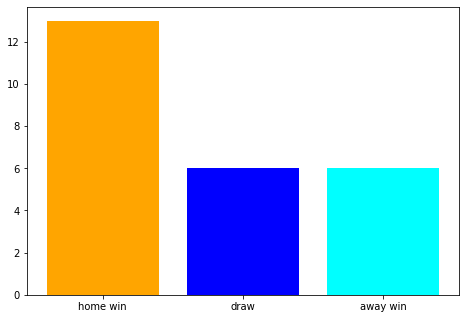

In [47]:
# assigning variable names and result
home_win = 13
draw = 6
away_win = 6

# setting up barchart plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# labelling each instance in result
result = ['home win', 'draw', 'away win'] 
# parsing the frequency of each instance 
occurences = [home_win, draw, away_win]


# 'result' set as x-axis and 'occurences' as y-axis
# and specify 'color' for each instance of result
ax.bar(result, occurences, color=['orange', 'blue', 'cyan']) 
plt.show()

Q2: What is the aggregate of goals scored by home teams compared to away teams in the Belgium Jupiler League in August 2008?

In [48]:
# time to group the wins by result again and sum each column
plot_table = bjp_aug08_edit.groupby('result').sum()

# should return the numbers of goals scored by home & away team 
# in each instance of 'result' for Aug 2008
plot_table

,home_team_goal,away_team_goal
result,,
away win,4,16
draw,7,7
home win,32,5


Notice how groupby() returned result in alphabetical order

In [49]:
# to confirm, we can print the sum of all goals scored by home and away teams in Aug 2008
bjp_aug08_edit['home_team_goal'].sum(),bjp_aug08_edit['away_team_goal'].sum()

(43, 28)

Those numbers look just about right!

Plotting Multiple Columns of Pandas Dataframe on Bar Chart with Matplotlib: 
https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/

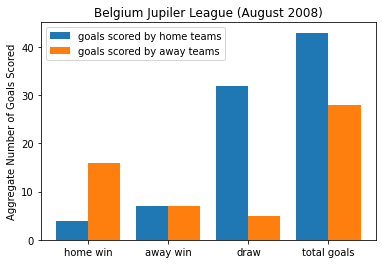

In [50]:
# naturally, one should adjust the order of 'result' to fit the returned groupby() index
# this prevents the attachement of aggregate scores to the wrong result_group
# but using np.arrange(), we can specify that our chart be plotted according to the length/order of our x-variable
# that is,'result'

result = ['home win', 'away win', 'draw', 'total goals'] 
home_team_goal = [4, 7, 32, 43] # last entry denotes aggregate sum of home_team_goal
away_team_goal = [16, 7, 5, 28] # last entry denotes aggregate sum of away_team_goal

# np.arange() method is used to create a range of values
# arrange chart in order of the items in the 'result' list
result_axis = np.arange(len(result)) 

# then we shift the bars -0.2 and 0.2 units from the x-axis to avoid overlapping
plt.bar(result_axis - 0.2, home_team_goal, 0.4, label = 'goals scored by home teams')
plt.bar(result_axis + 0.2, away_team_goal, 0.4, label = 'goals scored by away teams')
  
plt.xticks(result_axis, result)
plt.xlabel("")
plt.ylabel("Aggregate Number of Goals Scored")
plt.title("Belgium Jupiler League (August 2008)")
plt.legend()
plt.show()

Still on the August '08 analysis,\
Q3: I would like to know the distribution of goals per matchweek (gpwk) for home & away teams in the league\
Q4: And possibly find out the weekly distribution of match results, that is, home-win/draws/away-win in the league in August 2008\
To improve our understanding and uncover more insights

In [51]:
# we need to add the 'stage' column to our display 
# to help us solve this problem
bjp_gpwk = belgium_jupiler_league_df[['season', 'date', 'stage', 'home_team_goal', 'away_team_goal', 'result']]

#view new DataFrame
bjp_gpwk 

,season,date,stage,home_team_goal,away_team_goal,result
0,2008/2009,2008-08-17,1,1,1,draw
1,2008/2009,2008-08-16,1,0,0,draw
2,2008/2009,2008-08-16,1,0,3,away win
3,2008/2009,2008-08-17,1,5,0,home win
4,2008/2009,2008-08-16,1,1,3,away win
...,...,...,...,...,...,...
1723,2015/2016,2015-09-25,9,4,2,home win
1724,2015/2016,2015-09-26,9,2,2,draw
1725,2015/2016,2015-09-27,9,0,1,away win
1726,2015/2016,2015-09-27,9,1,0,home win


In [52]:
# Using pandas.DataFrame.query() to select DataFrame Rows
# Our goal once again is to filter by dates only within August 2008
start_date = '2008-08-01'
end_date   = '2008-08-31'

# assigning our 'bjp_gpwk' dataframe to a smaller version of itself
# that zooms in on the problem at hand
bjp_aug2008_gpwk = bjp_gpwk.query('date >= @start_date and date <= @end_date')

# checking success
bjp_aug2008_gpwk

,season,date,stage,home_team_goal,away_team_goal,result
0,2008/2009,2008-08-17,1,1,1,draw
1,2008/2009,2008-08-16,1,0,0,draw
2,2008/2009,2008-08-16,1,0,3,away win
3,2008/2009,2008-08-17,1,5,0,home win
4,2008/2009,2008-08-16,1,1,3,away win
6,2008/2009,2008-08-16,1,2,2,draw
7,2008/2009,2008-08-16,1,1,2,away win
8,2008/2009,2008-08-16,1,1,0,home win
100,2008/2009,2008-08-23,2,2,2,draw
101,2008/2009,2008-08-23,2,3,0,home win


Ideally leagues are made up of matchweeks and for us to be sure that we can assume the column 'stage' correctly refer to the matchweeks in August 2008, I lifted a tool from https://stackoverflow.com/questions/48655801/tables-in-markdown-in-jupyter \
(also at: https://www.thecodeteacher.com/question/68693/Tables-in-Markdown-(in-Jupyter)) \
to enable us view the month's calendar in our jupyter notebook

| Sun | Mon | Tue | Wed | Thurs | Fri | Sat |
|---:|:---|:---|:---|:---|:---|:---|
|  |  |  |  |  | 1 | 2 |
| 3 | 4 | 5 | 6 | 7 | 8 | 9 |
| 10 | 11 | 12 | 13 | 14 | 15 | 16 |
| 17 | 18 | 19 | 20 | 21 | 22 | 23 |
| 24 | 25 | 26 | 27 | 28 | 29 | 30 |
| 31 |  |  |  |  |  |  | \


From here, the distribution of matches is clear! \
There were three (3) match-weeks in August 2008 and if the week starts at 16th, then it restarts at 23rd and 30th respectively thereby corresponding to the labels 1,2 and 3. We can therefore proceed to rename the column 'stage' as 'matchweek'.

Renaming a single column: https://www.digitalocean.com/community/tutorials/pandas-rename-column-index

In [53]:
# I'm assigning the renamed column to the same dataframe
# to avoid creating another dataframe
bjp_aug2008_gpwk = bjp_aug2008_gpwk.rename(columns={'stage': 'matchweek'})

# checking for success
bjp_aug2008_gpwk

,season,date,matchweek,home_team_goal,away_team_goal,result
0,2008/2009,2008-08-17,1,1,1,draw
1,2008/2009,2008-08-16,1,0,0,draw
2,2008/2009,2008-08-16,1,0,3,away win
3,2008/2009,2008-08-17,1,5,0,home win
4,2008/2009,2008-08-16,1,1,3,away win
6,2008/2009,2008-08-16,1,2,2,draw
7,2008/2009,2008-08-16,1,1,2,away win
8,2008/2009,2008-08-16,1,1,0,home win
100,2008/2009,2008-08-23,2,2,2,draw
101,2008/2009,2008-08-23,2,3,0,home win


In [54]:
# to sort our dataframe by days in the month of august 2008
# sorting is automatically in ascending  order
# matches played on the same days are then sorted by their index

bjp_aug2008_gpwk.sort_values(by='date', inplace=True) 

# now to check success
bjp_aug2008_gpwk

,season,date,matchweek,home_team_goal,away_team_goal,result
1,2008/2009,2008-08-16,1,0,0,draw
2,2008/2009,2008-08-16,1,0,3,away win
4,2008/2009,2008-08-16,1,1,3,away win
6,2008/2009,2008-08-16,1,2,2,draw
7,2008/2009,2008-08-16,1,1,2,away win
8,2008/2009,2008-08-16,1,1,0,home win
0,2008/2009,2008-08-17,1,1,1,draw
3,2008/2009,2008-08-17,1,5,0,home win
107,2008/2009,2008-08-23,2,1,1,draw
106,2008/2009,2008-08-23,2,2,1,home win


In [55]:
bjp_aug2008_gpwk['matchweek'].value_counts()

3    9
1    8
2    8
Name: matchweek, dtype: int64

Though the value_counts() method did not return in a particular order but we can see there were:\
8 matches played in matchweek one (Aug 16-22)\
8 matches played in matchweek two (Aug 23-29)\
9 matches played in matchweek three (Aug 30-31) 

# Quick Note
**I'd really love to know how to control the order in which methods/commands return values to avoid inverted orders and possible errors stemming from such.**

**Do well to drop valuable suggestions for me**

In [56]:
# time to group the dataframe by matchweek and sum each column
gpwk_plot_table = bjp_aug2008_gpwk.groupby('matchweek').sum()

# should return the numbers of goals scored by home & away team 
# in each instance of 'matchweek' for Aug 2008
gpwk_plot_table

,home_team_goal,away_team_goal
matchweek,,
1,11,11
2,19,7
3,13,10


Usually, I have found that most plots use the variables to be plotted as variable names and parse the values or parameters of sch variable in lists. I have often typed them out (as with the goals scored question answered earlier) but from checking the link below, I found a tolist() and zip() methods that helps me parse columns into lists in cases of large dataset that I cannot type out manually.

How to Add SUM of values of two LISTS into new LIST: \
https://stackoverflow.com/questions/14050824/add-sum-of-values-of-two-lists-into-new-list

In [57]:
matchweek = ['MW 1','MW 2','MW 3']
ht_goals = gpwk_plot_table.home_team_goal.values.tolist()
at_goals = gpwk_plot_table.away_team_goal.values.tolist()
mwk_goals = [x + y for x, y in zip(ht_goals, at_goals)]

matchweek,ht_goals,at_goals,mwk_goals

(['MW 1', 'MW 2', 'MW 3'], [11, 19, 13], [11, 7, 10], [22, 26, 23])

Introduction to Line Plot Graphs with Matplotlib: https://www.youtube.com/watch?v=AYorFcI1MTU 

Line Plot with multiple Variables in Matplotlib:https://www.youtube.com/watch?v=IHXdRPYWXzw 

Methods to adjust the size of plots: https://www.geeksforgeeks.org/change-plot-size-in-matplotlib-python/


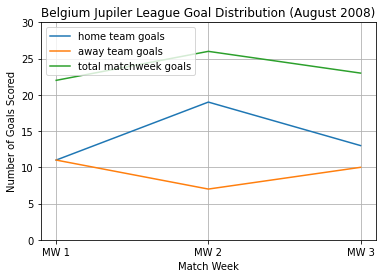

In [58]:

from matplotlib import rcParams # this is one method that helps me adjust the parameters of my plot (size for eg)

plt.plot(matchweek, ht_goals, label = "home team goals")
plt.plot(matchweek, at_goals, label = "away team goals")
plt.plot(matchweek, mwk_goals, label = "total matchweek goals")
rcParams['figure.figsize'] = [10, 6] # specifies [width, height] of the plot
plt.xlabel("Match Week")
plt.ylabel("Number of Goals Scored")
plt.title("Belgium Jupiler League Goal Distribution (August 2008)")
plt.grid(True) # applies grid to our plot
plt.ylim(0,30) # helps us control the intervals on our y-axis
plt.legend(loc=2) # displays label by color and accepts location parameters
# location parameters for plt.legend() 
# [1,2,3,4...10] represents 
# [top-right, top-left, bottom-right, bottom-left...center]
# You can try them out if you're reading this and you want to.
plt.show()


In [59]:
# we need only add the 'matchweek' and 'result' column to our display 
# to help us figure out the distrbution of results per week
bjp_result_pwk = bjp_aug2008_gpwk[['matchweek', 'result']]

# view new DataFrame
bjp_result_pwk 

,matchweek,result
1,1,draw
2,1,away win
4,1,away win
6,1,draw
7,1,away win
8,1,home win
0,1,draw
3,1,home win
107,2,draw
106,2,home win


In [60]:
# time to group the dataframe by matchweek and count each column
respwk_plot_table = bjp_result_pwk.groupby('matchweek').value_counts()

# should return the numbers of 'home win', 'draw' & 'away win' 
# in each matchweek for Aug 2008
respwk_plot_table

matchweek  result  
1          away win    3
           draw        3
           home win    2
2          home win    6
           draw        2
3          home win    5
           away win    3
           draw        1
dtype: int64

plotting multiple bar chart with three (3) variables: https://pythonguides.com/matplotlib-multiple-bar-chart/

In [61]:
matchweek = ['MW 1','MW 2','MW 3'] 

home_win = [2, 6, 5] 
draw = [3, 2, 1]
away_win = [3, 0, 3]

# checking success
matchweek,home_win,away_win,draw

(['MW 1', 'MW 2', 'MW 3'], [2, 6, 5], [3, 0, 3], [3, 2, 1])

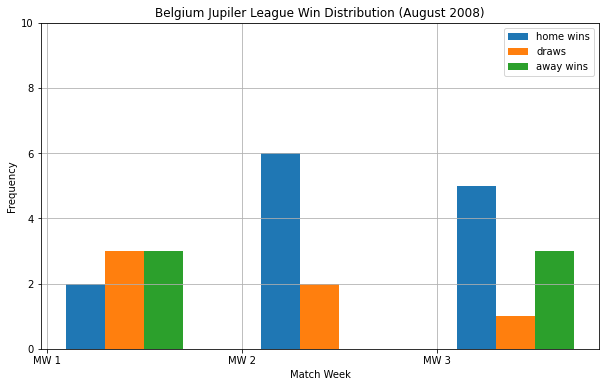

In [62]:

matchweek_axis = np.arange(len(matchweek)) # arrange chart in order of the items in the 'result' list

plt.bar(matchweek_axis +0.2, home_win, width=0.2, label = 'home wins') # 0.2 refers to width
plt.bar(matchweek_axis +0.2*2, draw, width=0.2, label = 'draws')
plt.bar(matchweek_axis +0.2*3, away_win, width=0.2, label = 'away wins')

plt.xticks(matchweek_axis,matchweek)

plt.xlabel("Match Week")
plt.ylabel("Frequency")
plt.title("Belgium Jupiler League Win Distribution (August 2008)")
plt.grid(True) # applies grid to our plot
plt.ylim(0,10) # helps us control the intervals on our y-axis
plt.legend() # displays label by color and accepts location parameters
plt.legend()
plt.show()

Conclusion:\
By virtue of this extensive analysis, we were able to uncover new insights including but not limited to:
1. We found out that the home team outscored the away sides and even equalled the goals scored by the away teams in matchwek when the away teams secured the most wins!
2. We also discovered that it was only in the first week of the season that the away teams dominated the league as the home teams swooped the other matchweeks
3. We also found that home teams won at least double the number of games away sides won in August 2008
4. Matchweek 2 recorded the most goals in August 2008 in the Belgium Jupiler league and the away teams scored the least number of goals that week and less than half what the home teams scored and in turn recorded no victory
5. The data also suggest a possible correlation between goals scored by home/away teams and the matches won each week
6. Most wins in August 2008 was in the matchweek two\

Limitations:\
While a good number of intra/inter-league and inter-team analyses are posssible and comparisons,distributions and several other insightful visuals are useful here, one likely limitations to any analysis done with this dataset is the undescriptive nature of the column headers and the incomplete nature of the rest of the columns not displayed in this analysis\
The columns carrying match statistics are not carrying enough information to know which team owned which stat as two teams play a match and the other columns ending with either H, D or A to the right of the match stat columns are populated but it is not clearly stated what information they carry, hence, it is possible that we might not be getting the best out of these dataset yet!\
Thank You!
